## [Chapter 6] 차원 축소

### 01. 차원 축소(Dimension Reduction) 개요

차원 축소는 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축쇟 새로운 차원의 데이터 세트를 생성하는 것. 일반적으로 차원이 증가할수록 희소(sparse)한 구조를 갖게 되며, 예측 신뢰도가 떨어짐. 또한, 피처가 많을 경우 개별 피처 간 상관관계가 높을 가능성이 크기 때문에 다중 공선성 문제로 모델의 예측 성능이 저하될 수 있음. **<font color=orange> 다차원의 피처를 차원 축소해 피처 수를 줄이면 더 직관적으로 데이터를 해석할 수 있으며, 학습 데이터의 크기가 줄어들어서 학습에 필요한 처리 능력도 줄일 수 있음.</font>**  
(차원 축소가 필요한 이유 참고 : https://firework-ham.tistory.com/45)  

</br>
차원 축소는 피처 선택(feature selection)과 피처 추출(feature extraction)로 나눌 수 있음.  

- 피처 선택 : 특정 피처에 종속성이 강한 불필요한 피처는 아예 제거하고, 데이터의 특징을 잘 나타내는 주요 피처만 선택하는 것. 기존 피처를 저차원의 중요 피처로 압축해서 추출하는 것으로, 기존의 피처와는 완전히 다른 값이 됨.
- 피처 추출 : 기존 피처를 단순 압축이 아닌, 함축적으로 더 잘 설명할 수 있는 또 다른 공간으로 매핑해 추출하는 것. 함축적인 요약 특성으로 추출함으로써 기존 피처가 인지하기 어려웠던 잠재적 요소를 추출하는 것을 의미함.

차원 축소는 단순히 데이터의 압축을 의미하는 것이 아닌, 잠재적인 요소를 추출하는 데 있으며, 이미지나 텍스트에서 잠재적 의미를 찾아주는 데 잘 활용되고 있음. 매우 **<font color=orange>많은 픽셀로 이뤄진 이미지 데이터에서 차원 축소를 수행하면, 분류 수행 시 과적합 영향력이 작아져 성능을 끌어 올릴 수 있음. 또한, 텍스트 문서에서 차원 축소를 수행하면, 문서 내 단어들의 구성에서 숨겨져 있는 시맨틱(Semantic) 의미나 토픽(Topic)을 잠재 요소로 간주하고 찾아낼 수 있음.</font>**

### 02. PCA(Principal Component Analysis)

#### PCA 개요
PCA는 가장 대표적인 차원 축소 기법으로, 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 **주성분(Principal Component)을 추출**해 차원을 축소하는 기법임. PCA는 **<font color=orange>분산이 데이터의 특성을 가장 잘 나타내는 것으로 간주하여 가장 높은 분산을 가지는 데이터의 축을 찾아 그 축으로 차원을 축소함.</font>**
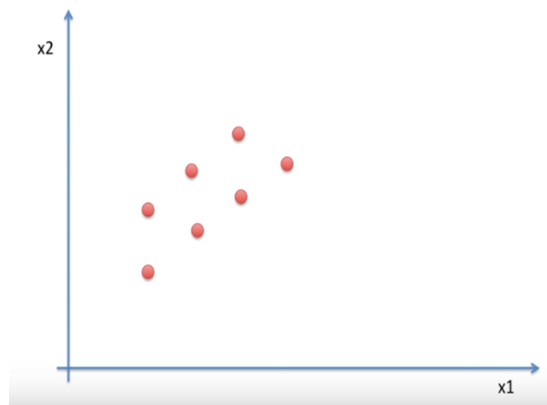
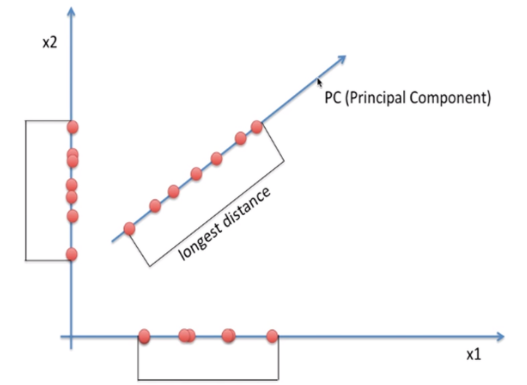  
위처럼 PCA는 데이터 변동성이 가장 큰 방향으로 축을 생성하고, 새롭게 생성된 축으로 데이터를 투영하는 방식. 단순히 x1축, x2축으로 점을 몰아넣는 것 보다 데이터가 퍼져있는 정도를 지켜주기 때문에 정보의 유실을 막을 수 있음. 단순히 x1축, x2축으로 투영한 것 보다 거리가 긴 것을 확인할 수 있음.
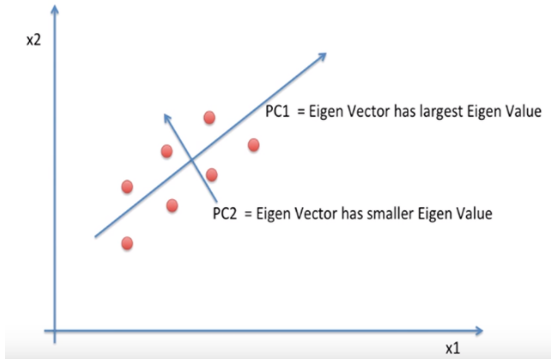
PCA는 가장 큰 데이터 변동성을 기반으로 첫 번째 벡터 축을 생성하고, 두 번째 축은 이 벡터 축에 직각이 되는 벡터를 축으로 함. 세 번째 축은 다시 두 번째 축과 직각이 되는 벡터를 설정하는 방식으로 축을 생성함. 이렇게 생성된 벡터 축에 원본 데이터를 투영함으로써 벡터 축의 개수만큼의 차원으로 축소됨. **<font color=orange>결과적으로 원본 데이터의 피처 개수에 비해 매우 작은 주성분으로 원본 데이터의 총 변동성을 대부분 설명할 수 있는 분석.</font>**  
</br>
PCA를 선형대수 관점애서 해석해 보면, **입력 데이터의 공분산 행렬(Covariance Matrix)을 고유값 분해하고, 이렇게 구한 고유벡터에 입력 데이터를 선형 변환하는 것.** 고유벡터가 PCA의 주성분 벡터로서 입력 데이터의 분산이 큰 뱡향을 나타냄. 고유값은 고유벡터의 크기를 나타내며, 동시에 입력 데이터의 분산을 나타냄.  
(선형대수학으로 해석한 PCA 더 자세한 설명 참고 : https://heung-bae-lee.github.io/2020/04/03/machine_learning_07/)  

**<font color=orange>즉, 입력 데이터의 공분산 행렬이 고유벡터와 고유값으로 분해될 수 있으며, 이렇게 분해된 고유벡터를 이용해 입력 데이터를 선형 변환하는 방식이 PCA.</font>**  
</br>
< PCA 수행 pipeline >
- 입력 데이터 세트의 공분산 행렬을 생성함.
- 공분산 행렬의 고유벡터와 고유값을 계산함.
- 고유값이 가장 큰 순으로 K개(PCA 변환 차수)만큼 고유벡터를 추출함.
- 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환함.

#### 붓꽃(iris) 데이터 세트에 PCA 적용하기  
: 4개의 속성으로 구성된 붓꽃 데이터를 2개의 PCA 차원으로 압축하는 예제

In [13]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])
%matplotlib inline
import numpy as np

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


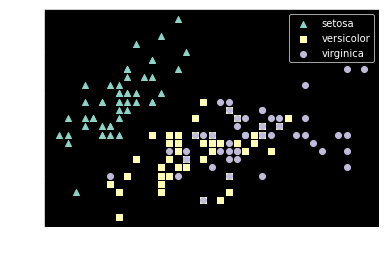

In [3]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [5]:
'''
PCA는 속성의 스케일에 영향을 받기 때문에
압축 전 각 속성값을 동일한 스케일로 변환하는 것이 필요
'''

from sklearn.preprocessing import StandardScaler

# Target값을 제외한 모든 속성 값을 스케일링
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:,:-1])

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # 2차원으로 축소

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [7]:
# PCA 환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head()

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


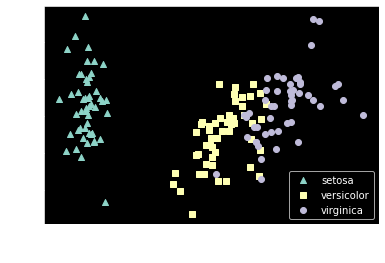

In [8]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()


In [9]:
# 개별 PCA 컴포넌트별로 차지하는 변동성 확인
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


→ 2개 요소로 원본 데이터의 변동성을 95% 설명할 수 있음을 확인.

In [14]:
# 원본 데이터 세트에 분류 적용

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target,scoring='accuracy',cv=3)
print('원본 데이터 교차 검증 개별 정확도 : ', scores)
print('원본 데이터 평균 정확도 : ', np.mean(scores))

원본 데이터 교차 검증 개별 정확도 :  [0.98 0.94 0.96]
원본 데이터 평균 정확도 :  0.96


In [15]:
# PCA 변환 데이터 세트에 분류 적용

pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3 )
print('PCA 변환 데이터 교차 검증 개별 정확도 : ', scores_pca)
print('PCA 변환 데이터 평균 정확도 : ', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도 :  [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도 :  0.88


→ 원본 데이터 세트 대비 예측 성능이 떨어짐. 하지만, 속성 개수가 50% 감소한 것 대비 정확도는 10% 하락했기에, PCA 후에도 원본 데이터의 특성을 상당 부분 유지하고 있음을 알 수 있음.

#### credit card 데이터 세트에 PCA 적용하기

In [16]:
import pandas as pd

# header로 의미 없는 첫 행 제거, iloc으로 기존 id 제거
df = pd.read_excel('credit_card.xls', header=1, sheet_name='Data').iloc[0:,1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [17]:
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1)

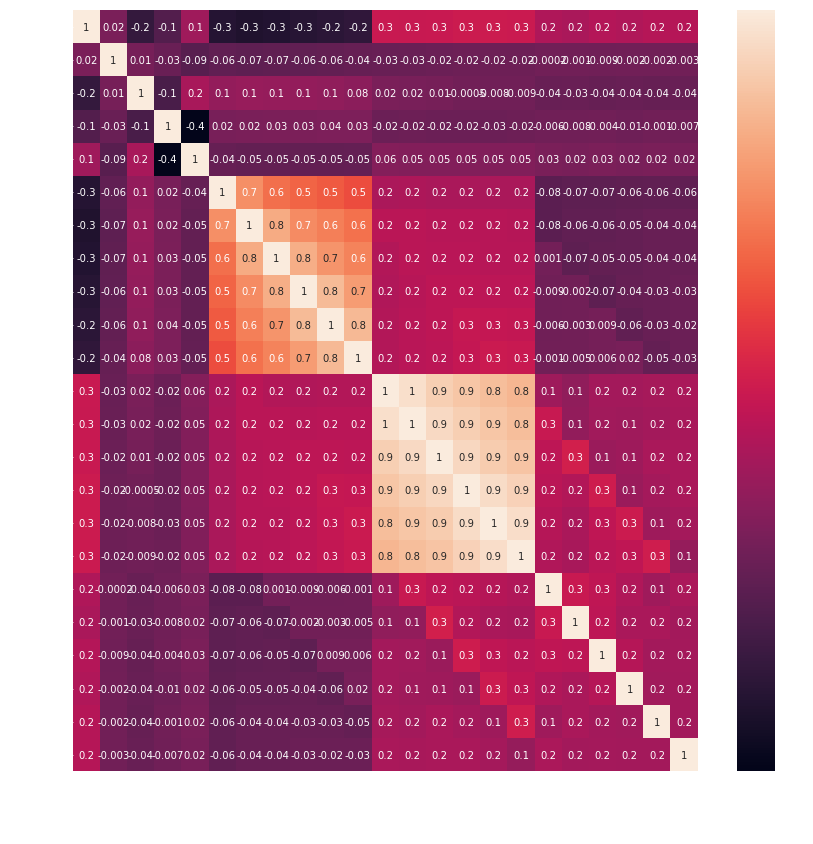

In [20]:
# 각 속성 별 상관도 시각화

import seaborn as sns

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')
plt.show()

→ BILL_AMTI1 ~ BILL_AMTI6 6개의 속성끼리의 상관도가 매우 높음을 확인, PAY_1 ~ PAY_6 까지의 속성끼리의 상관도도 높음을 확인. BILL_AMTI1 ~ BILL_AMTI6 6개의 속성을 2개의 컴포넌트로 PCA 변환해보자.

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#BILL_AMT1 ~ BILL_AMT6 까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명:',cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산 위해 fit( ) 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled) 

print('PCA Component별 변동성:', pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


→ 6개 속성 간 상관도가 매우 높음을 다시 한 번 확인할 수 있음. 특히 첫번째 속성 만으로 전체 변동성의 90%를 설명할 수 있음.

In [22]:
# 원본 데이터 분류 예측

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3 )

print('CV=3 인 경우의 개별 Fold세트별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

CV=3 인 경우의 개별 Fold세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


In [23]:
# 6개 컴포넌트로 PCA 변환한 데이터 분류 예측

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터셋에 먼저 StandardScaler적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 Component를 가진 PCA 변환을 수행하고 cross_val_score( )로 분류 예측 수행. 
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도:',scores_pca)
print('PCA 변환 데이터 셋 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도: [0.7924 0.7987 0.8034]
PCA 변환 데이터 셋 평균 정확도:0.7982


→ 전체 속성의 약 1/4 수준인 6개의 PCA 컴포넌트만으로도 원본 데이터 기반 결과보다 약 1~2% 정도의 예측 성능 저하만 발생함. 미비한 성능 저하는 아니지만, PCA의 뛰어난 압축 능력을 확인할 수 있음.  
PCA는 데이터를 쉽게 인지하는 데 활용할 수 있으며, 컴퓨티 비전 분야의 얼굴 인식에서 원본 얼굴 이미지 변환에 사용하는 경우가 많음.

### 03. LDA(Linear Discriminant Analysis)

#### LDA 개요
LDA는 선형 판별 분석법으로, 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소하는 기법이지만 PCA와 달리 **지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소함.** 입력 데이터의 변동성의 가장 큰 축을 찾는 PCA와 달리 **<font color=orange>LDA는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾음.</font>**
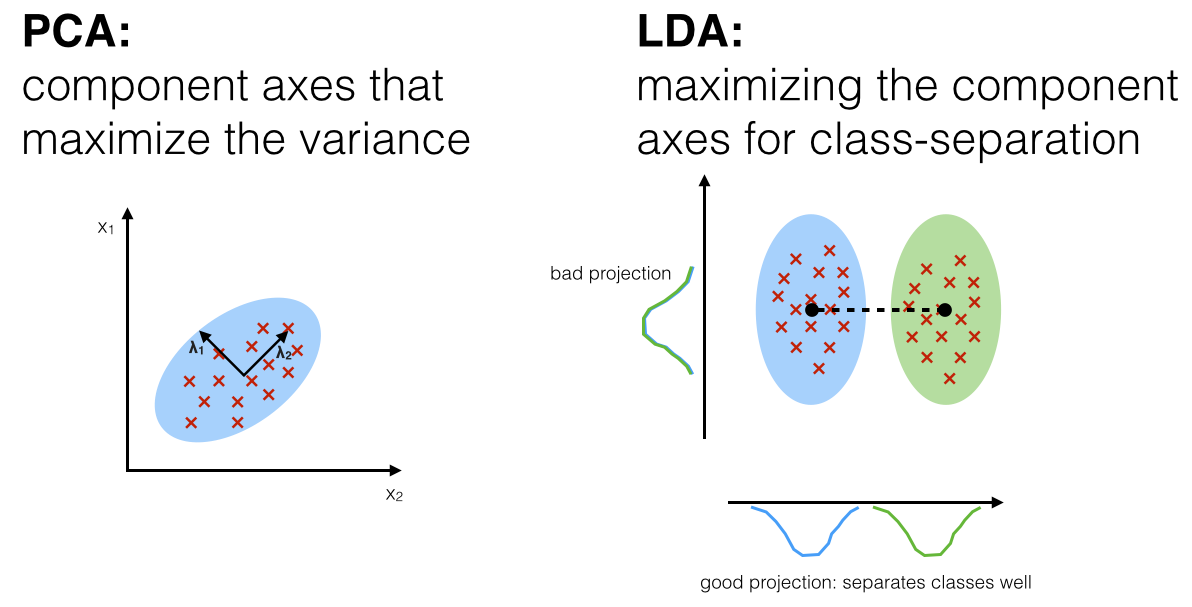  
LDA는 특정 공간상에서 클래스 분리를 최대화하는 축을 찾기 위해 클래스 간 분산(between-class scatter)과 클래스 내부 분산(within-class scatter)의 비율을 최대화하는 방식으로 차원을 축소함. 즉, **<font color=orange>클래스 간 분산은 최대한 크게 가져가고, 클래스 내부의 분산은 최대한 작게 가져가는 방식.</font>** 정보손실이 존재하며, 타겟값이 입력돼야 한다는 것이 특징임.  
</br>
< LDA 수행 pipeline >
- 클래스 내부와 클래스 간 분산 행렬을 구함. 이 두 개의 행렬은 입력 데이터의 결정 값 클래스별로 개별 피처의 평균 벡터(mean vector)를 기반으로 구함.
- 클래스 내부 분산 행렬을 $S_w$, 클래스 간 분산 행렬을 $S_B$라고 하면 다음 식으로 두 행렬을 고유벡터로 분해할 수 있음.  
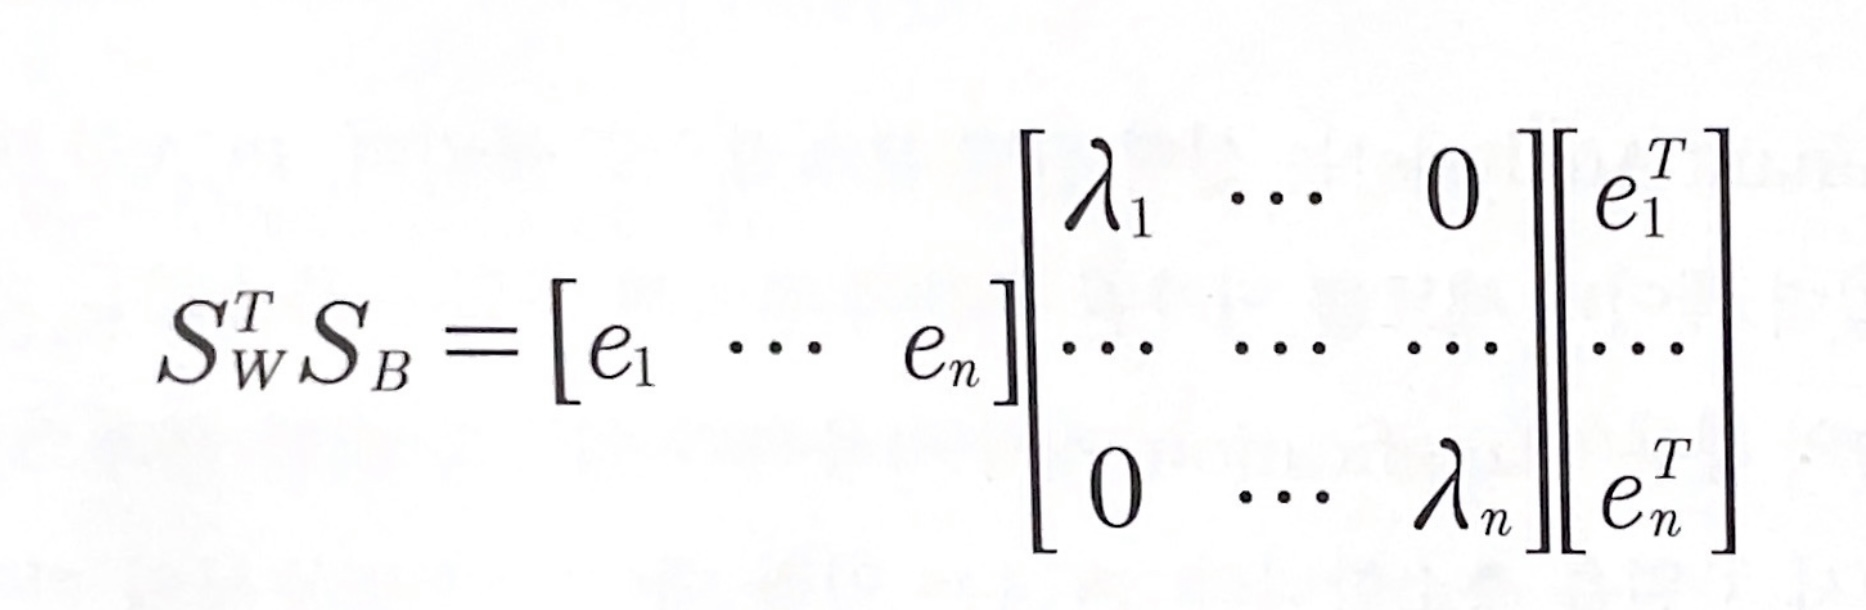  
</br>
- 고유값이 가장 큰 순으로 K개(LDA변환 차수만큼) 추출함.
- 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환함.

#### 붓꽃 데이터 세트에 LDA 적용하기

In [24]:
# 데이터 로드 및 스케일링

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [25]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target) # LDA는 지도학습이기 때문에 결정값이 입력됨
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


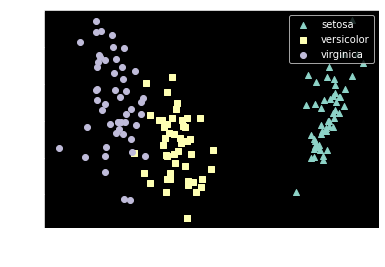

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda,columns=lda_columns)
irisDF_lda['target']=iris.target

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

### 04. SVD(Singular Value Decomposition)

#### SVD 개요
SVD는 PCA와 유사한 행렬 분해 기법을 이용함. 정방행렬만을 고유벡터로 분해하는 PCA와 달리, 정방행렬뿐만 아니라 **<font color=orange>행과 열의 크기가 다른 행렬에도 적용할 수 있음. 일반적으로 SVD는 $m$ x $n$ 행렬 A를 $A = U \sum V^T$ 와 같이 분해하는 것을 의미함.</font>**  
</br>
SVD는 특이값 분해로 불리며, 행렬 $U$와 $V$에 속하는 벡터는 특이벡터(singular vector)이며, 모든 특이 벡터는 서로 직교하는 성질을 가짐. $\sum$는 대각행렬이며, $\sum$이 위치한 0이 아닌 값이 행렬 A의 특이값임.
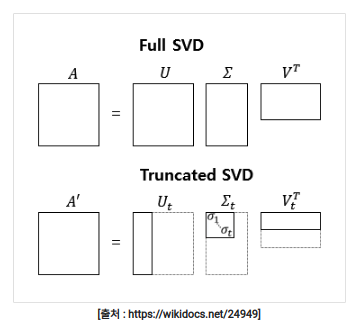  
하지만 일반적으로 $\sum$의 비대각 부분과 대각 원소 중 특이값이 0인 부분을 모두 제거하고 $\sum$의 대각원소 중 상위 몇 개만 추출하여 대응하는 $U$와 $V$의 원소도 함께 제거해 더욱 차원을 줄인 형태로 분해하는 **Truncated SVD**를 적용함.

- Full SVD 를 이용한 행렬 분해

In [28]:
# numpy의 svd 모듈 import
import numpy as np
from numpy.linalg import svd

# 4X4 Random 행렬 a 생성 
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [29]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n',np.round(U, 3))
print('Sigma Value:\n',np.round(Sigma, 3))
print('V transpose matrix:\n',np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [30]:
# 다시 원본행렬로 복원되는지 확인
# Sima를 다시 0 을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [31]:
# row 간 의존성이 있을 경우 차원 축소가 진행되는지 확인을 위해 행렬값 조정
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [32]:
# 다시 SVD를 수행하여 Sigma 값 확인 
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n',np.round(Sigma,3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


→ 이전과 차원은 같지만 Sigma 값 중 2개가 0으로 변함.

In [34]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_,Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


- Truncated SVD 를 이용한 행렬 분해

In [35]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고, SVD를 적용할 경우 U, Sigma, Vt 의 차원 확인 
np.random.seed(121)
matrix = np.random.random((6, 6))
print('원본 행렬:\n',matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:',U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행. 
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:',U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr,np.diag(Sigma_tr)), Vt_tr)  # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 

→ Truncated SVD를 이용해 행렬을 분해할 경우 원본 행렬을 정확히 다시 원복할 수는 없지만, 데이터 정보가 압축되어 분해됨에도 불구하고 상당한 수준으로 원본 행렬을 근사할 수 있음.

#### 붓꽃 데이터 세트에 사이킷런 TruncatedSVD 클래스 적용하기

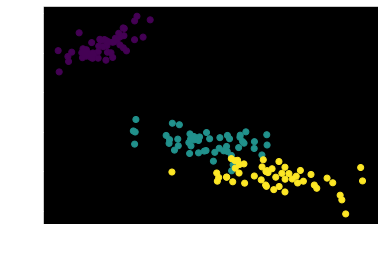

In [39]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
# 2개의 주요 component로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# Scatter plot 2차원으로 TruncatedSVD 변환 된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')
plt.show()

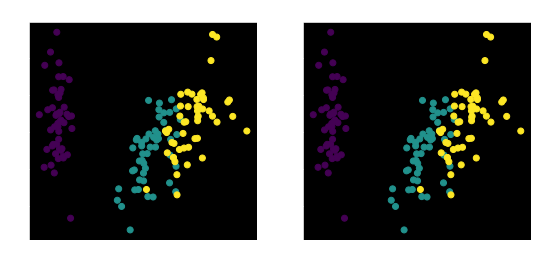

In [40]:
from sklearn.preprocessing import StandardScaler

# iris 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행 
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행 
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA변환 데이터를 오른쪽에 표현 
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
ax2.scatter(x=iris_pca[:,0], y= iris_pca[:,1], c= iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')
plt.show()

In [41]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())

2.3497176426801047e-15
-7.632783294297951e-17


→ TruncatedSVD와 PCA 클래스 모두 SVD를 이용해 행렬을 분해함. 붓꽃 데이터 스케일링 후 변환을 해 보면 두 개가 거의 동일함을 확인할 수 있음. 하지만 PCA는 밀집 행렬(Dense Matrix)에 대한 변환만 가능하며 SVD는 희소 행렬(Sparse Matrix)에 대한 변환도 가능함.  
</br>
SVD 역시 컴퓨터 피전 영역에서 이미지 압축에 활용되며, 텍스트의 토픽 모델링 기법인 LSA(Latent Semantic Analysis)의 기반 알고리즘임.

### 05. NMF(Non-Negative Matrix Factorization)

#### NMF 개요
NMF는 Truncated SVD와 같이 낮은 랭크를 통한 행렬 근사(Low-Rank Approximation) 방식의 변형. **NMF는 원본 행렬 내의 모든 원소 값이 모두 양수라는 게 보장되면 간단하게 두 개의 기반 양수 행렬로 분해될 수 있는 기법임.**
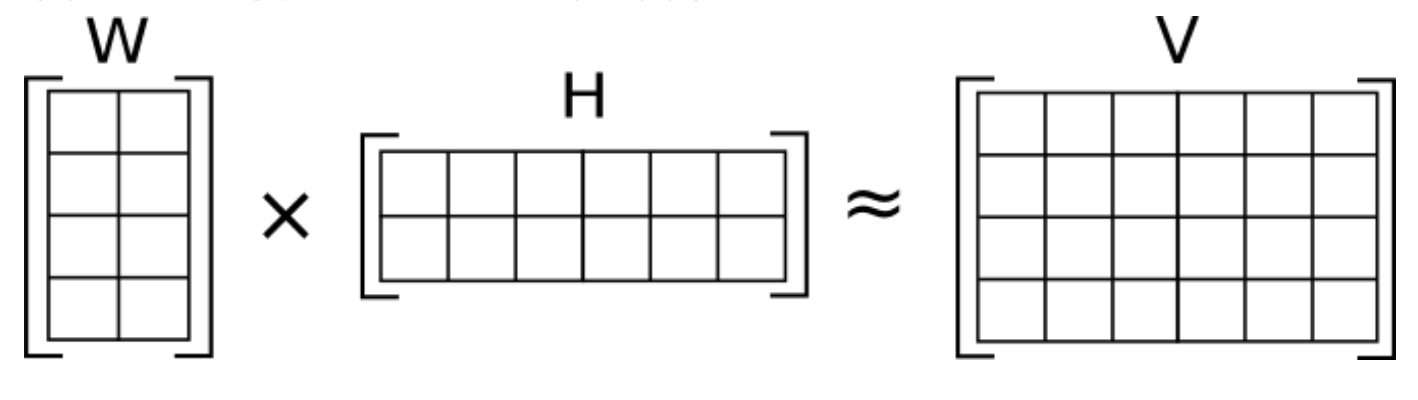  
분해 행렬 W는 원본 행에 대해서 잠재 요소의 값이 얼마나 되는지에 대응하며, 분해 행렬 H는 이 잠재 요소가 원본 열(속성)로 어떻게 구성됐는지를 나타내는 행렬임.  

#### 붓꽃 데이터 세트에 NMF 적용하기

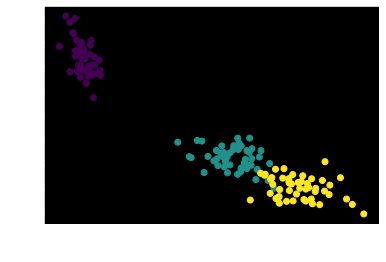

In [45]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
    
iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0], y= iris_nmf[:,1], c= iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')
plt.show()

NMF는 SVD와 유사하게 차원 축소를 통한 잠재 요소 도출로 이미지 변환 및 압축, 텍스트의 토픽 도출 등의 영역에서 사용되고 있음. 또한, 잠재적인 요소를 추출해 예측한 상품을 추천해주는 추천 시스템에 활발하게 적용되고 있음.